## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:
        
              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [87]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

sns.set_style("whitegrid")

In [53]:
def get_data(data_path: str):
  data = pd.read_csv(data_path)
  return data

In [68]:
data = get_data(data_path="./motorbike_ambulance_calls.csv")

In [10]:
print("Статистична інформація:")
data.describe()

Статистична інформація:


,index,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,5017.0295,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.0000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,8690.0000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,13034.5000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,17379.0000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


In [57]:
print("Мінімальні значення:")
display(data.min())

print("\nМаксимальні значення:")
display(data.max())

Мінімальні значення:


index              1
date          1/1/11
season        autumn
yr                 0
mnth               1
hr                 0
holiday            0
weekday            0
workingday         0
weathersit         1
temp            0.02
atemp            0.0
hum              0.0
windspeed        0.0
cnt                1
dtype: object


Максимальні значення:


index          17379
date          9/9/12
season        winter
yr                 1
mnth              12
hr                23
holiday            1
weekday            6
workingday         1
weathersit         4
temp             1.0
atemp            1.0
hum              1.0
windspeed     0.8507
cnt              977
dtype: object

In [12]:
print(f"Розмірність датасету: {data.shape}")

Розмірність датасету: (17379, 15)


**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [14]:
print("Інформація по типах змінних:\n")
data.info()

Інформація по типах змінних:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 2.0+ MB


**Завдання 3** пепевірте всі змінні на наявність пропусків.

In [15]:
print("Інформація по пропусках:\n")
data.isnull().sum()

Інформація по пропусках:



index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

**Висновки з 1-3 завдання (детальні)**



1. Датасет містить 15 колонок та 17379 рядків.    
2. Датасет містить багато категоріальних змінних, проте змінні, що стосуються опису власне погоди, є чисельними.  
3. Деякі колонки треба буде закодовувати, оскільки вони складаються з рядкових значень, щоб можливо було використовувати їх для подальшого аналізу та навчання. Також потрібно буде перевести колонку date в тип дати.
4. Перевіривши датасет на пропуски було визначено, що він не містить жодних пропусків. Тому нам не буде потрібно заповнювати якісь колонки медіаною або  видаляти атрибути через велику кількість пропусків.



**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [69]:
def tranform_date(df: pd.DataFrame, date_col_name: str):
  df[date_col_name] = pd.to_datetime(df[date_col_name], format='%m/%d/%y')
  return df
  
processed_data = tranform_date(data.copy(), 'date')

display(processed_data.head(3))

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,2011-01-01,spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,2011-01-01,spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32


In [70]:
def get_time_limits(df: pd.DataFrame, date_col_name: str):
  first_day = df[date_col_name].min()
  last_day = df[date_col_name].max()

  print(f"First day of dataset - {first_day}.\nLast day of dataset - {last_day}")

get_time_limits(processed_data, "date")

First day of dataset - 2011-01-01 00:00:00.
Last day of dataset - 2012-12-31 00:00:00


Провівши перетворення дати (з рядку місяць/день/рік у формат datetime) ми отримали коректний запис цієї змінної в датасеті. Це дозволило нам визначити перший та останній дні в записах. Також якщо порівняти цей результат з максимальними/мінімальними значеннями, які ми виводили до перетворення, то можна помітити, що до перетворення останній день виводився неправильно.

#Аналіз категоріальних змінних

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [123]:
data_categorical = processed_data.drop(["index", "date", "temp", "atemp", "hum", "windspeed"], axis="columns")
display(data_categorical.head(3))

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,cnt
0,1,0,1,0,0,6,0,1,16
1,1,0,1,1,0,6,0,1,40
2,1,0,1,2,0,6,0,1,32


**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [91]:
def encode_season(df: pd.DataFrame, season_col_name: str):
  season_map = {"spring": 1, "summer": 2, "autumn": 3, "winter": 4}
  df[season_col_name] = df[season_col_name].map(season_map)
  return df

data_categorical = encode_season(data_categorical, "season")
display(data_categorical.head(3))

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit
0,1,0,1,0,0,6,0,1
1,1,0,1,1,0,6,0,1
2,1,0,1,2,0,6,0,1


**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

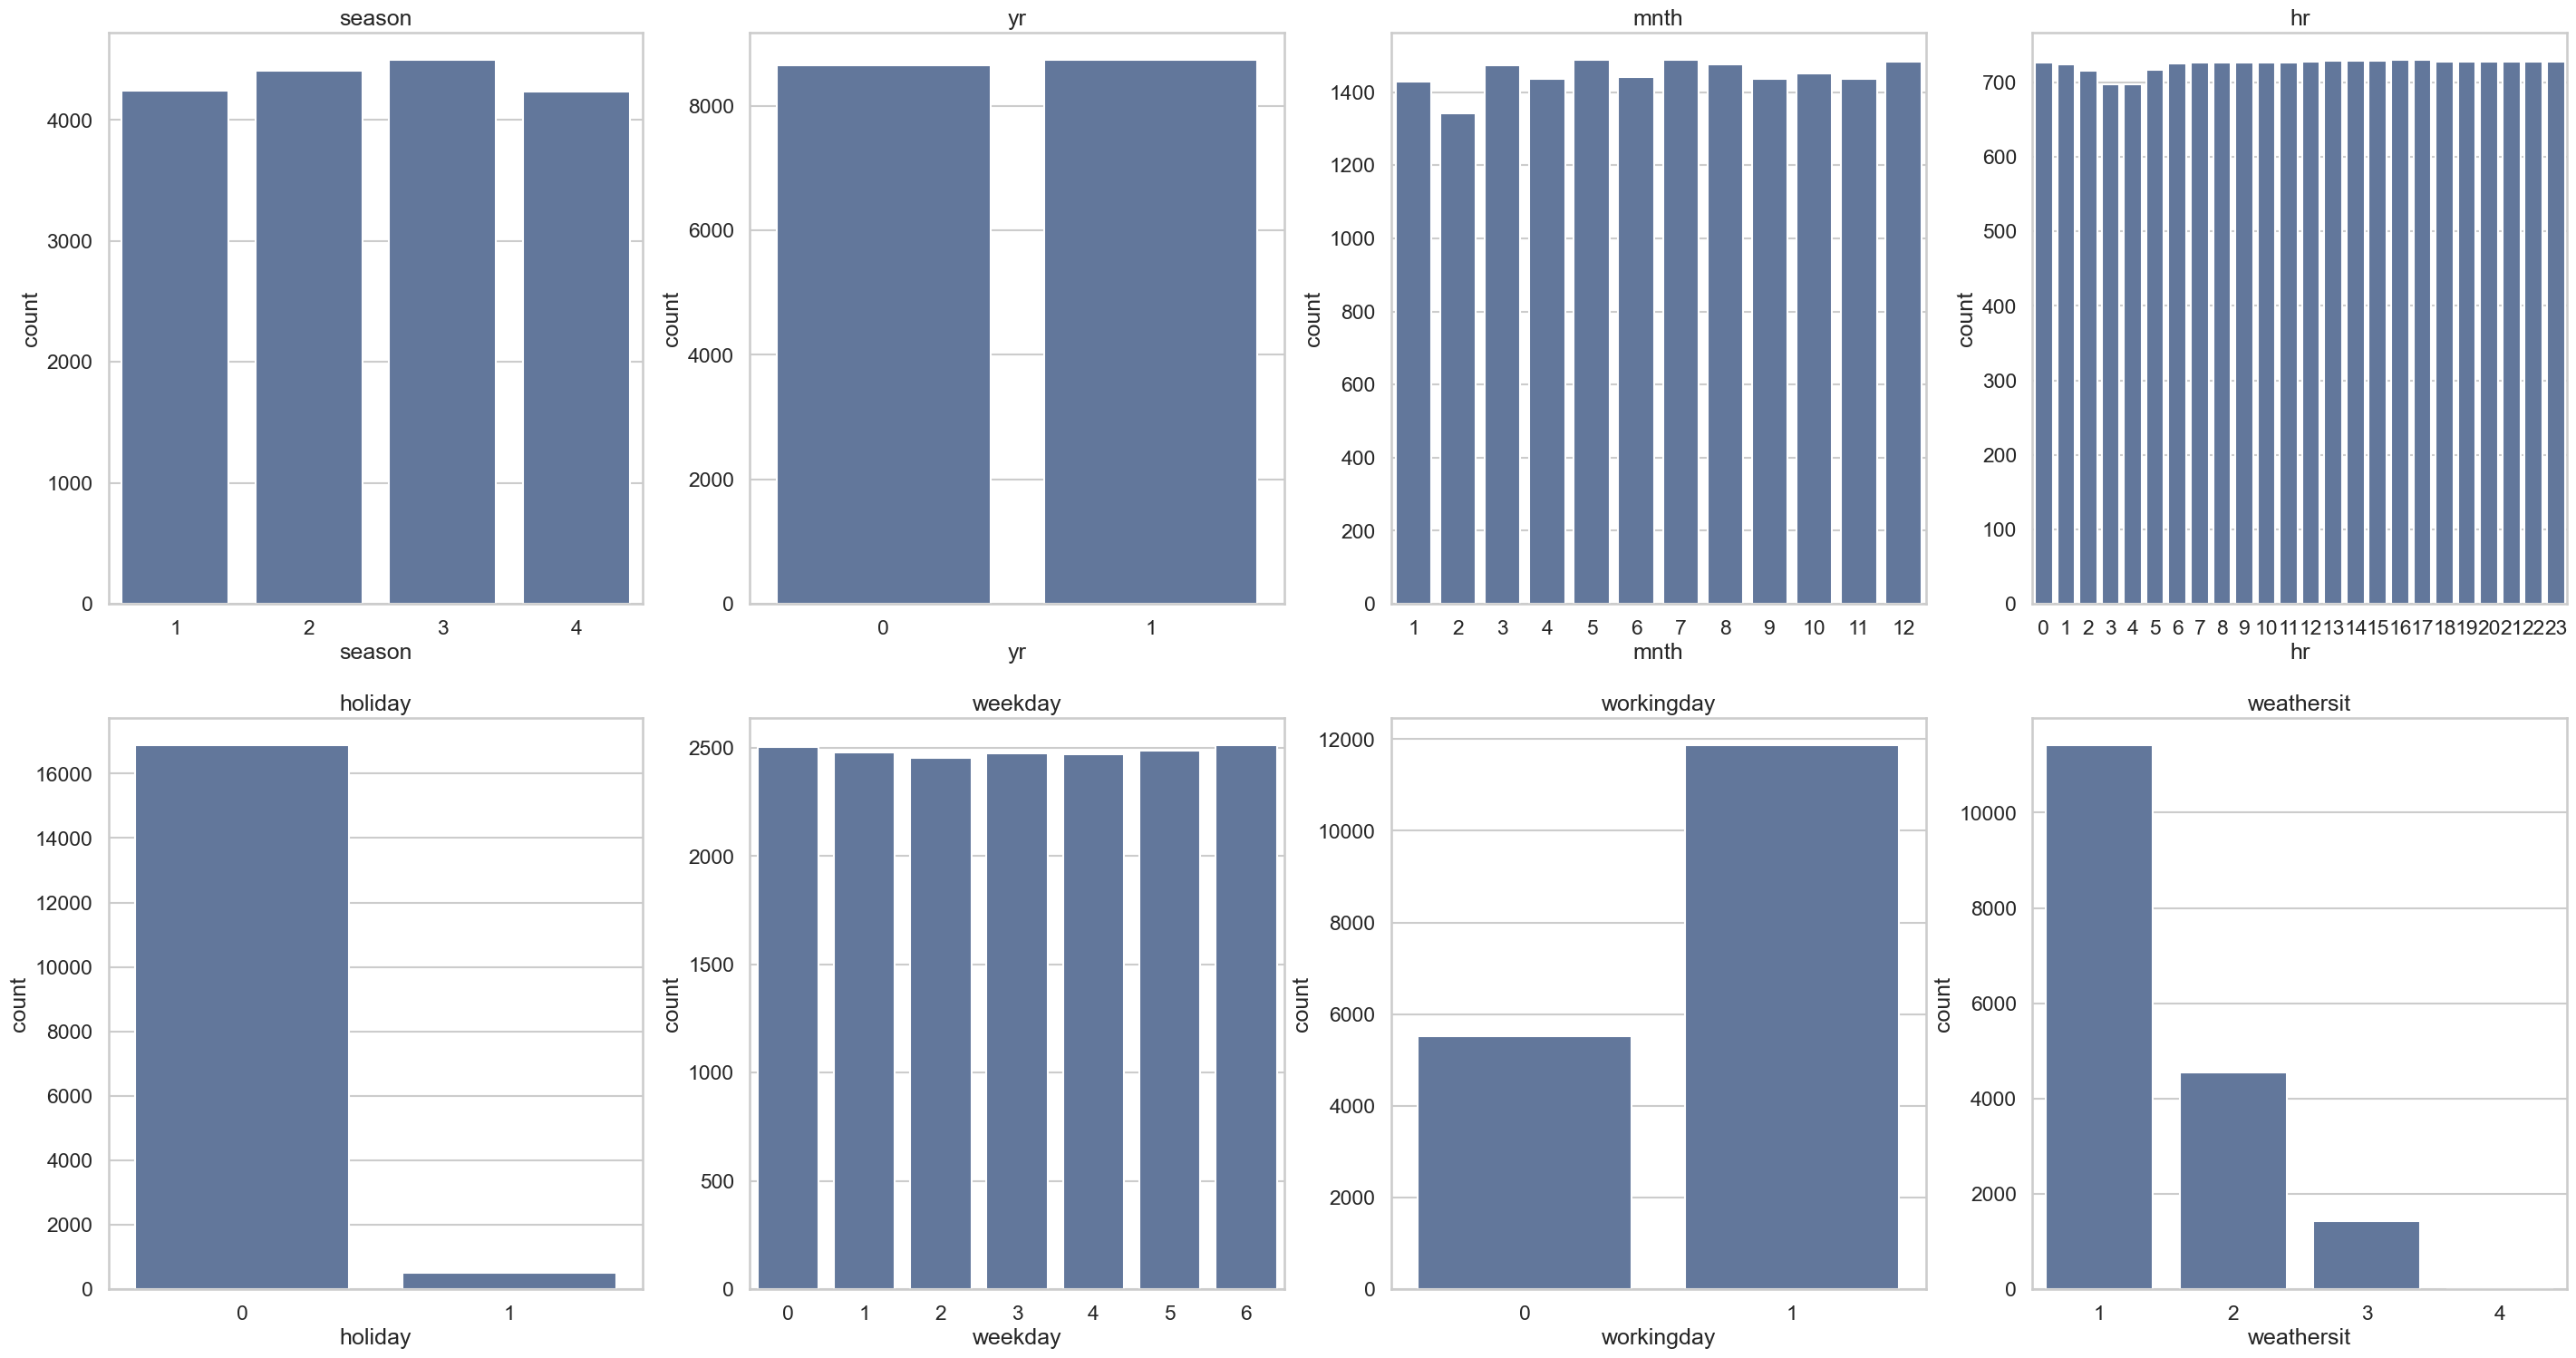

In [92]:
fig, ax = plt.subplots(2, 4, figsize=(35, 18))
for variable, subplot in zip(data_categorical, ax.flatten()):
  if variable != "cnt":
    sns.countplot(data=data_categorical, x = variable, ax=subplot, color='#5975A4')
    subplot.set_title(variable)

**Висновки з 5-7 завдання (детальні)**



1. В категоріальні змінні я виділила вісім атрибутів: season, yr, mnth, hr, holiday, weekday, workingday, weathersit. Вони містять скінченну кількість значень (категорій) або взагалі є булевими змінними. Інші атрибути містять неперервні змінні, тому їх відносимо до числових.
2. Категорію season було закодовано значеннями від 1 до 4 відповідно для використання цього атрибуту у навчанні в подальшому.
3. По категоріальним змінним було побудовано графіки. Кожен з них зображає кількість даних в кожній з категорій. ***Детальніше по кожній з категорій***:

- `season`: показує кількість записів за кожен сезон. Кожна категорія містить приблизно однакову кількість записів. Проте, найбільша кількість значень має категорія 3 (осінь).
- `year`: показує кількість записів за 2011 та 2012 роки. За 2012 рік значень трохи більше, ніж за 2011 рік.
- `month`: показує кількість записів за кожен з місяців за два роки. Кількість записів в кожній категорії змінюється від 1400 до 1600, проте трохи менше записів є за 2 місяць. 
- `hour`: показує кількість записів за кожну годину протягом дня. З графіку видно, що кількість записів на кожну годину майже однакова, проте з 1 до 4 ранку кількість записів зменшується і протягом 3-4 години ранку є найменшою.
- `holiday`: показує кількість записів протягом свят (1) та звичайних днів (0). Зафіксована дуже мала кількість записів під час свят.
- `weekday`: показує кількість записів за кожен з днів тижня. Кількість записів змінюється в дуже малому діапазоні.
- `workingday`: показує кількість записів за вихідні (0) та робочі дні (1). Кількість записів за вихідні значно менша за кількість в робочі дні.
- `weathersit`: покахує кількість записів відповідно до погодних умов, які були в той день. Це єдина категорія, яка є порядковою. 1 відповідає за найліпші погодні умови, 4 - за найгірші. Кількість записів під час найкращих погодних умов є найбільшою.



#Аналіз числових змінних

**Завдання 8** виділити числові змінні в окремий датасет

In [115]:
data_numerical = processed_data[["temp", "atemp", "hum", "windspeed", "cnt"]]
display(data_numerical.head(3))

,temp,atemp,hum,windspeed,cnt
0,0.24,0.2879,0.81,0.0,16
1,0.22,0.2727,0.80,0.0,40
2,0.22,0.2727,0.80,0.0,32


**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

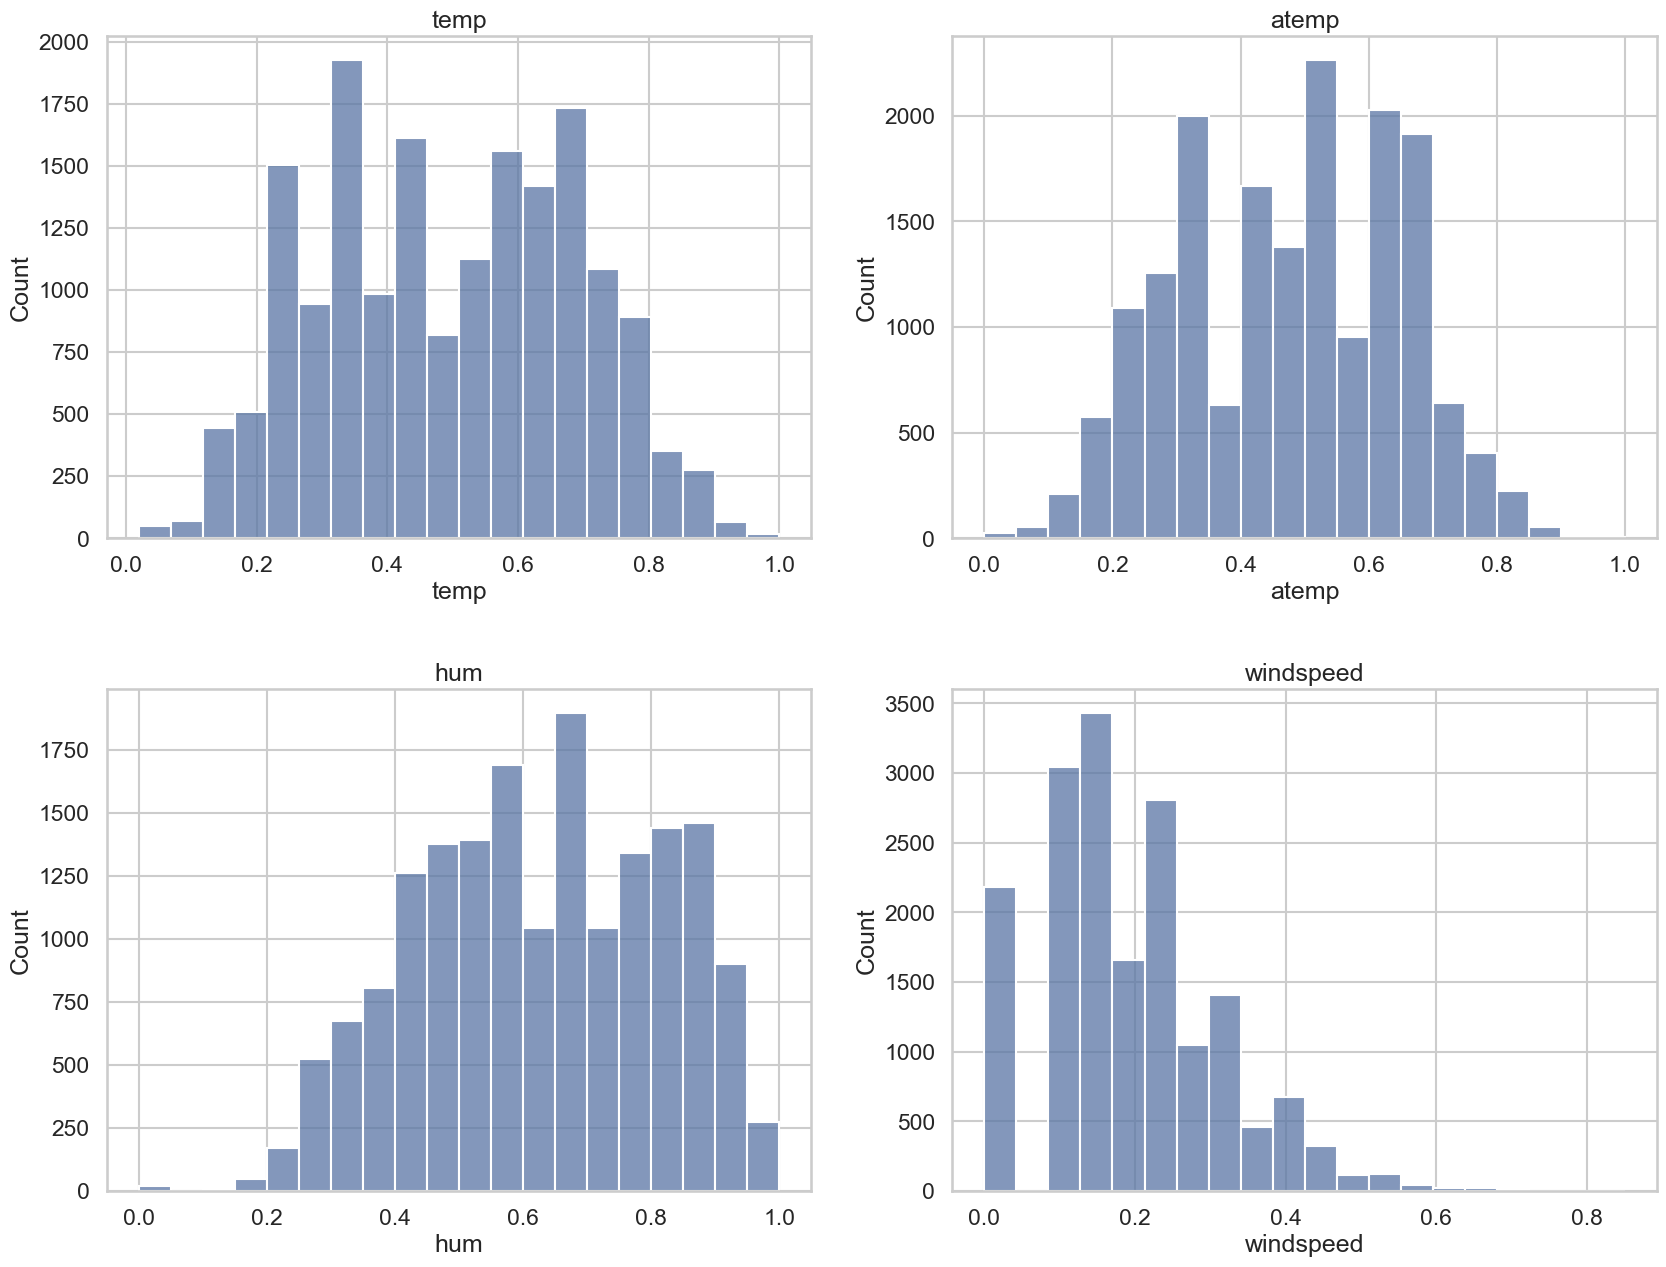

In [116]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
plt.subplots_adjust(hspace=0.3)

for variable, subplot in zip(data_numerical, ax.flatten()):
  if variable != "cnt":
    sns.histplot(data=data_numerical, x = variable, bins=20, ax=subplot, color='#5975A4')
    subplot.set_title(variable)

**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

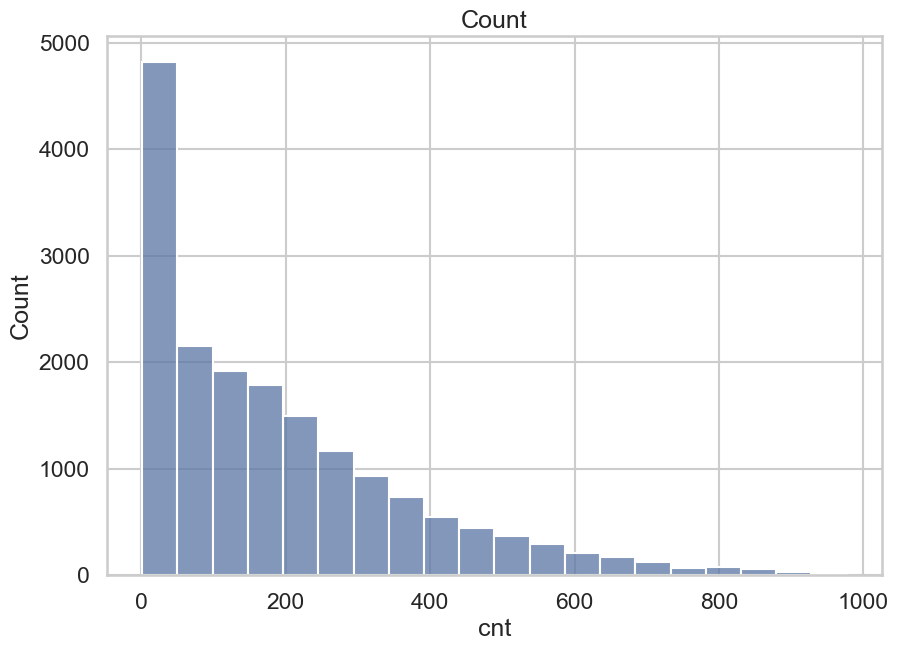

Асиметрія: 1.2774116037490577. Розподіл має важчий правий хвіст.


In [133]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))

sns.histplot(data=processed_data[["cnt"]], bins=20, ax=ax, x="cnt", color='#5975A4')
ax.set_title("Count")

plt.show()

skewness = processed_data["cnt"].skew()
if skewness > 0:
    print(f"Асиметрія: {skewness}. Розподіл має важчий правий хвіст.")
elif skewness < 0:
    print(f"Асиметрія: {skewness}. Розподіл має важчий лівий хвіст.")
else:
    print("Розподіл симетричний.")

**Висновки з 8-10 завдання (детальні)**


1.   
2.   
3. ...



#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

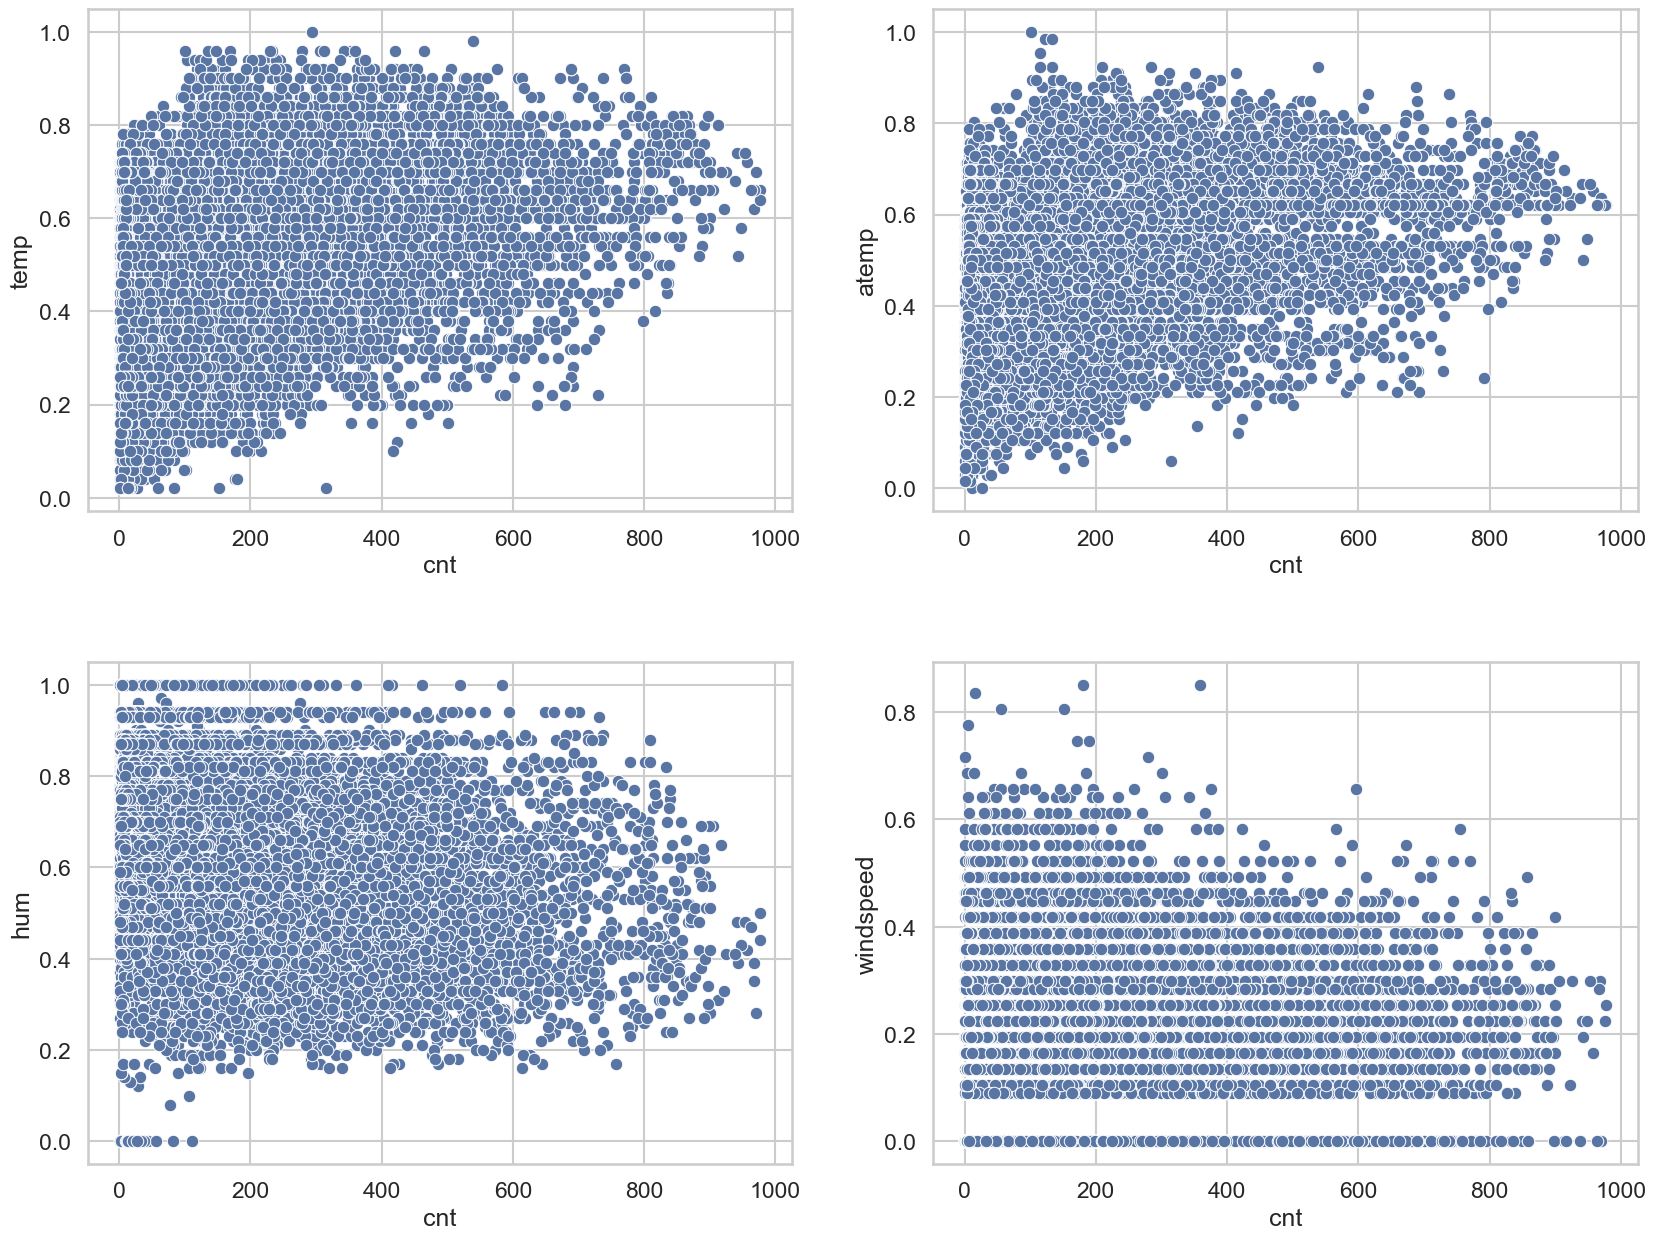

In [120]:
fig, ax = plt.subplots(2,2, figsize=(20, 15))
plt.subplots_adjust(hspace=0.3)

for var, subplot in zip(data_numerical.drop('cnt', axis =1), ax.flatten()):
  sns.scatterplot(data=data_numerical, x='cnt', y=var, ax=subplot, color='#5975A4')

**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

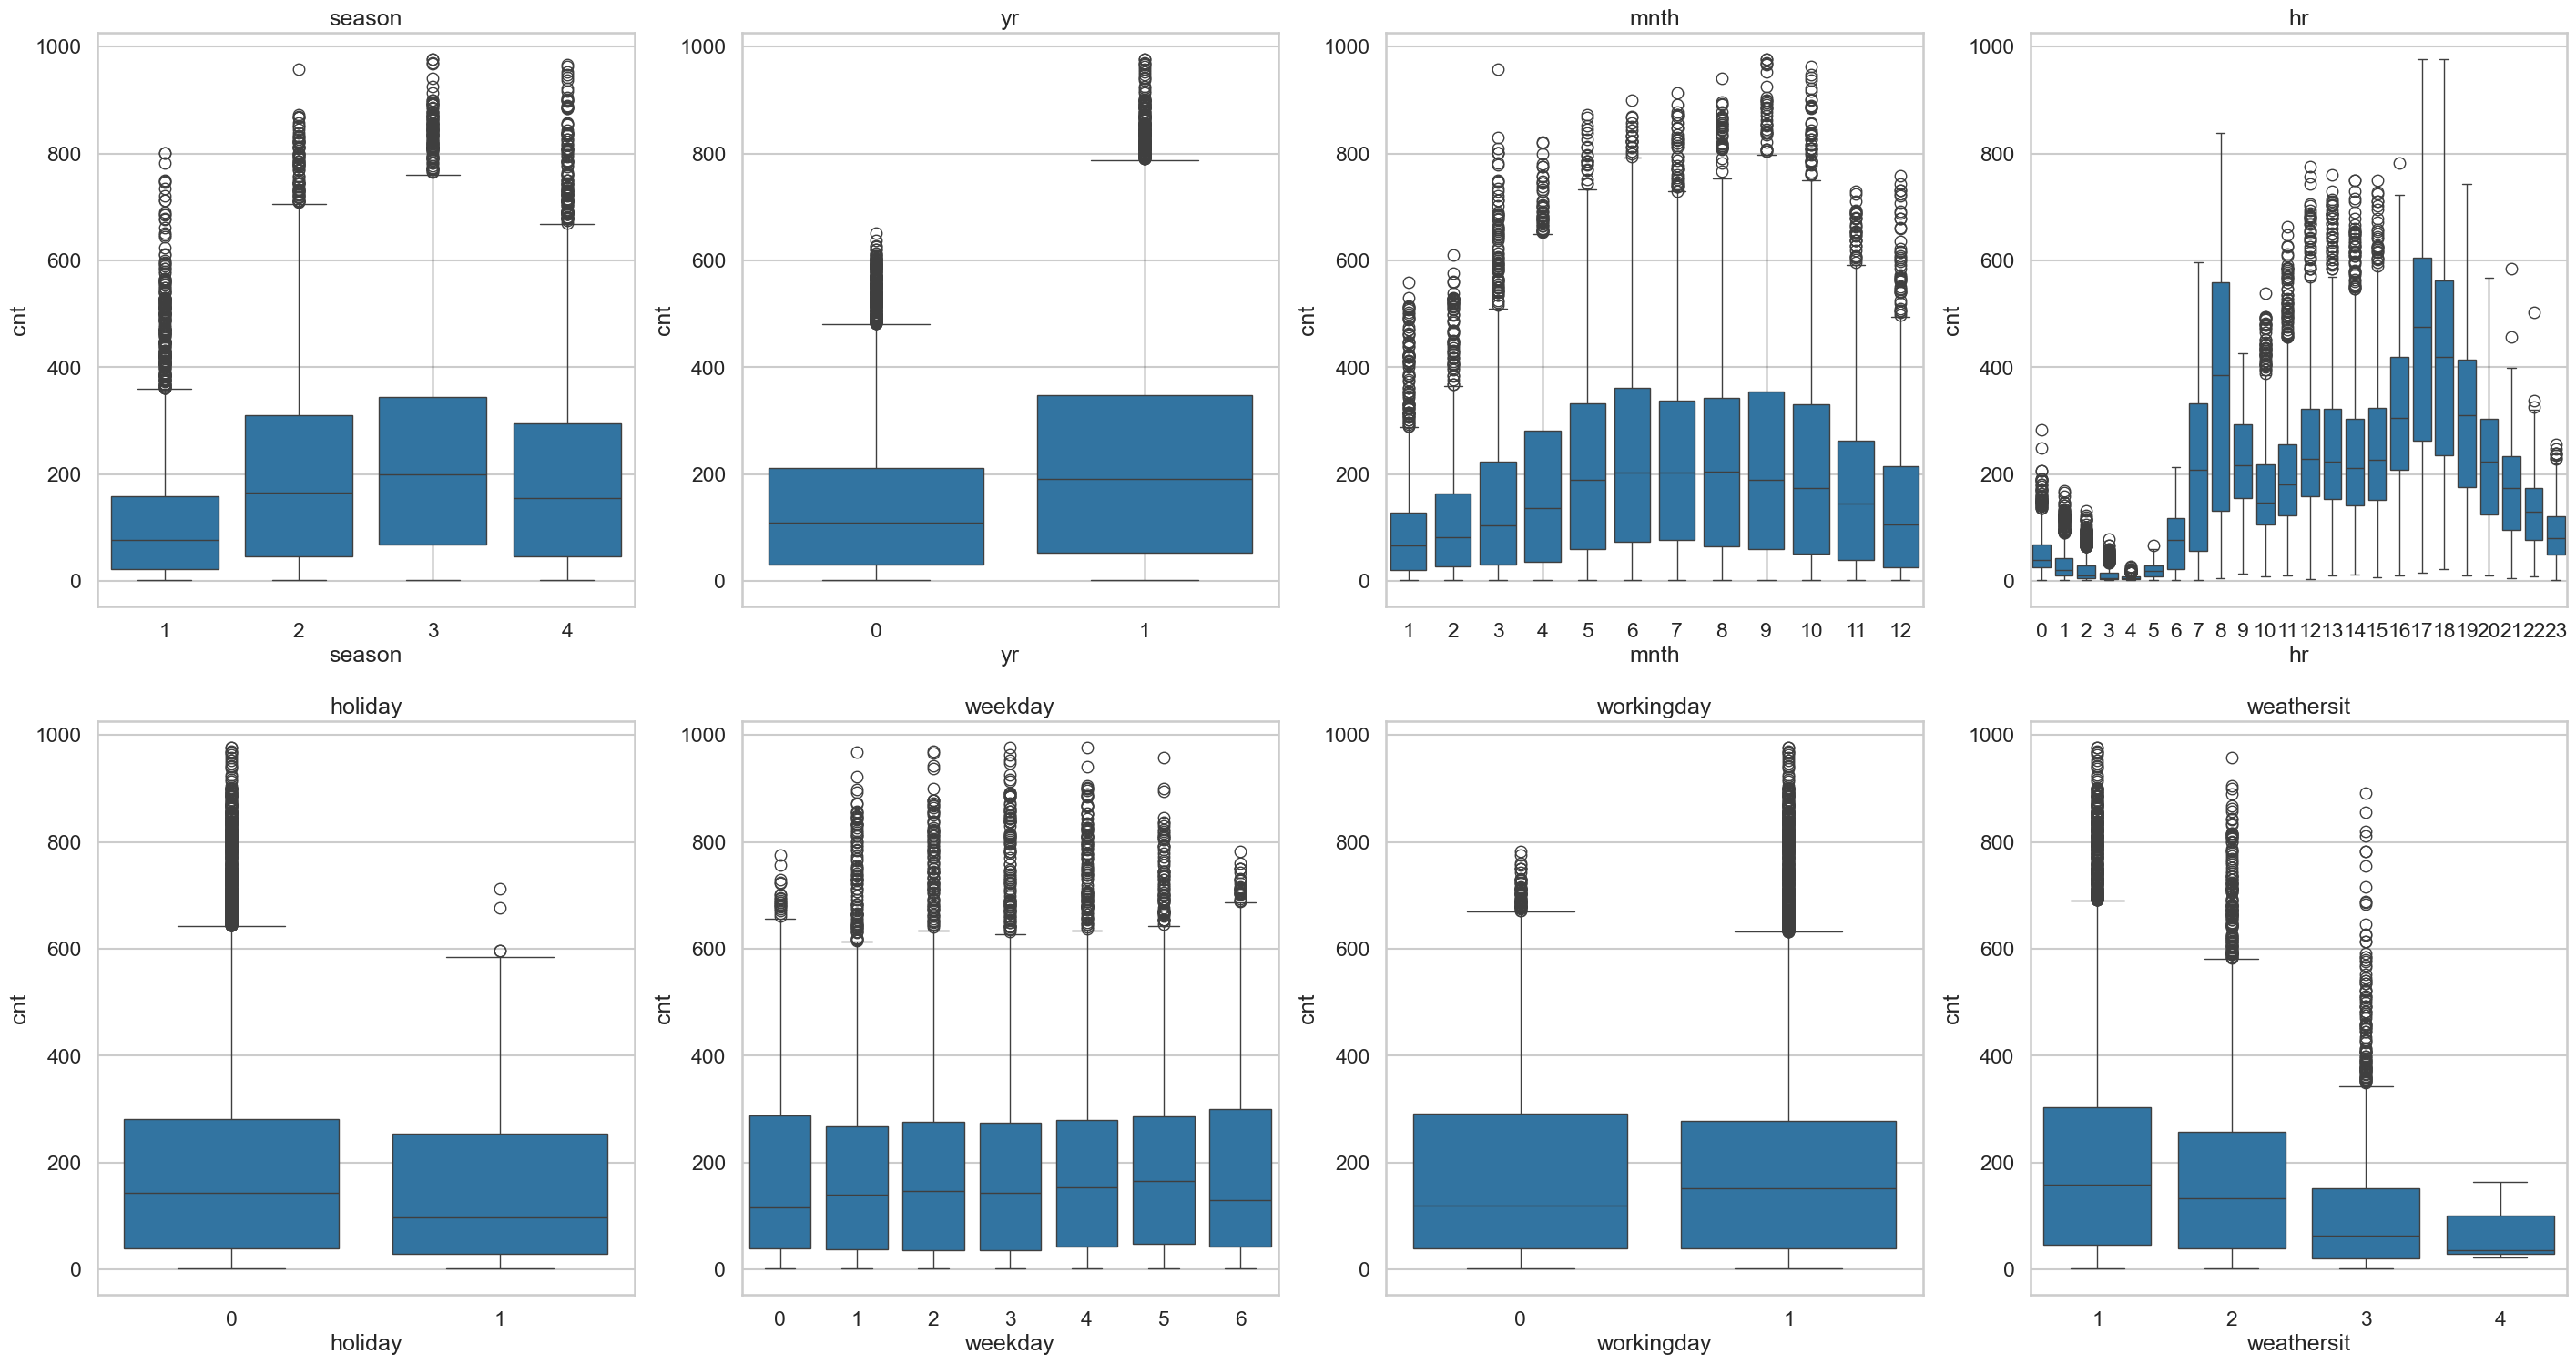

In [128]:
fig, ax = plt.subplots(2, 4, figsize=(35, 18))

for var, subplot in zip(data_categorical, ax.flatten()):
  sns.boxplot(data=data_categorical, y="cnt", x=var, ax=subplot)
  subplot.set_title(var)

**Висновки з 11-12 завдання (детальні)**



1.   
2.   
3. ...



**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

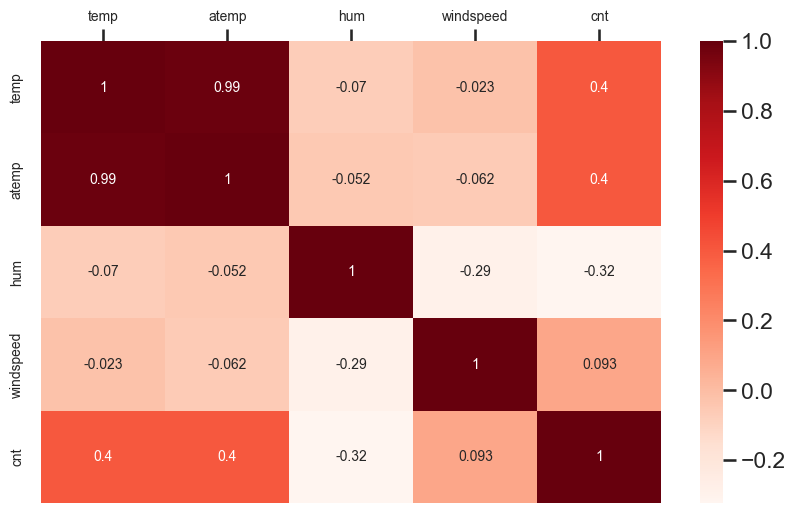

In [130]:
corr_coefficients_pearson = data_numerical.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr_coefficients_pearson, annot=True, cmap='Reds', ax=ax, annot_kws={'size': 10})
ax.tick_params(labelsize=10)
ax.xaxis.tick_top()

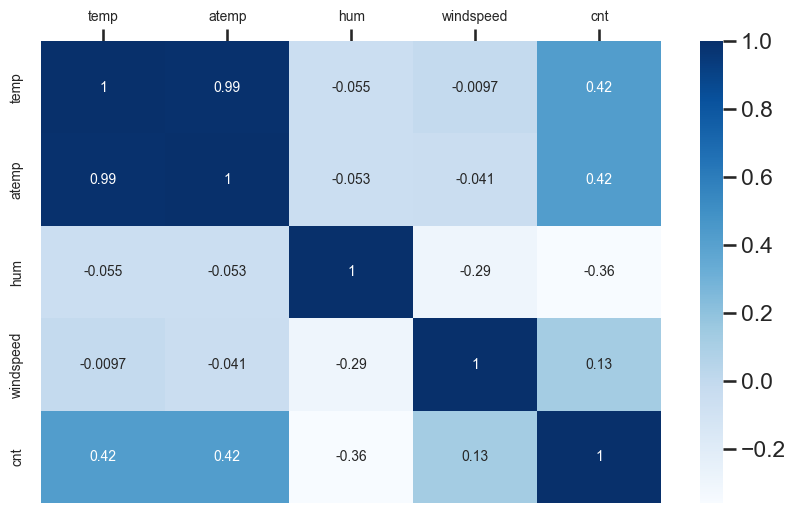

In [132]:
corr_coefficients_spearman = data_numerical.corr(method='spearman')
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr_coefficients_spearman, annot=True, cmap='Blues', ax=ax, annot_kws={'size': 10})
ax.tick_params(labelsize=10)
ax.xaxis.tick_top()

#your conclusions 

**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [ ]:
def get_dummies(df: pd.DataFrame):
  features = pd.concat([df,
                      # example:
                      pd.get_dummies(df['season']),
                      #YOUR CODE
                      ], axis = 1
                     )
  features = features.drop(['season',
                            'mnth', 
                            'weekday', 
                            'weathersit'
                            ], axis = 1)
  return fetures

In [ ]:
features = get_dummies(data)

2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [ ]:
features['night_hours'] = #your code
features = features.drop('hr', axis = 1)

**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [ ]:
features_lr = features.drop(['spring', 'mnth_4', 'weekday_0', 'weathersit_1', 'hr_0','atemp', 'date'], axis = 1)

In [ ]:
def get_train_data(df: pd.DataFrame, target:str, test_size:float):
  X = #your code (all features)
  y = #your code (target variable)
  X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=42, shuffle = True)
  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3)

In [ ]:
def train_linear_model(X_train, y_train):
  model = LinearRegression()
  model.fit(X_train, y_train)
  return model

model = train_linear_model(X_train, y_train)

In [ ]:
# predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# scores
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

In [ ]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='#98c3d9', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
plt.tight_layout()

**Висновки з завдання (детальні)**



1.   
2.   
3. ...

